### Data Visualization using Area plot, Histogram and Bar chart

#### Reading Data

##### importing all required module

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

##### Fetching data file

In [2]:
#checking all available files in current directory
%ls

AreaPlot_Histogram_BarChart.ipynb
Canada.xlsx
lineChart.ipynb
PieChart_BoxPlot_ScatterPlot_BubblePlot.ipynb


In [3]:
#path of data file
path = 'Canada.xlsx'

#using read_excel function to read data file
df = pd.read_excel(
    path,
    sheet_name='Canada by Citizenship',
    skiprows= range(20),
    skipfooter=2
)

print("Data has been successfully read!!")

Data has been successfully read!!


In [4]:
#viewing our data frame
#top 5 rows
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


##### viewing details of data frame

In [5]:
#viewing summary of data frame
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [6]:
#getting columns
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [7]:
#getting index
df.index

RangeIndex(start=0, stop=195, step=1)

In [8]:
#displating the data type of columns and index
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [9]:
#checking shape of data frame
df.shape

(195, 43)

#### Cleaning the data

##### Dropping unnecessary columnd ad renaming columns for convenience

In [10]:
#dropping unnecessary coulmns
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [11]:
#cheking changes in data frame
df.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [12]:
#changing the name of columns 
df.rename(columns={
    'OdName' : 'Country' ,
    'AreaName' : 'Continent' ,
    'RegName' : 'Region'
}, inplace=True)

In [14]:
# Examining the type of column labels to ensure they are string
all(isinstance(column, str) for column in df.columns)

False

A the output is False, so we need to change them to String

In [15]:
#changing columns to string
df.columns = list(map(str, df.columns))

#rechecking the column labels
all(isinstance(column, str) for column in df.columns)

True

In [16]:
#setting country name as index
df.set_index('Country', inplace=True)

df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [17]:
#adding a total column as total immigrants from 1980 to 2013 for each country
df['Total'] = df.sum(axis=1)

#biewing the changes
df.head(3)

/tmp/ipykernel_16214/3556969031.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [20]:
#creating a list of years as string to access data easily
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

##### Changing style of matplotlib

In [22]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [23]:
#changing style
mpl.style.use('dark_background')

#### Area Plot

```Visualize area plot for top 5 countries that contributed the most immigration to Canada```

In [24]:
#sorting values to get top 5 country
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

#get top 5 countries
df_top5 = df.head()

#transpose the data frame
df_top5 = df_top5[years].transpose()

#viewing new data frame
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


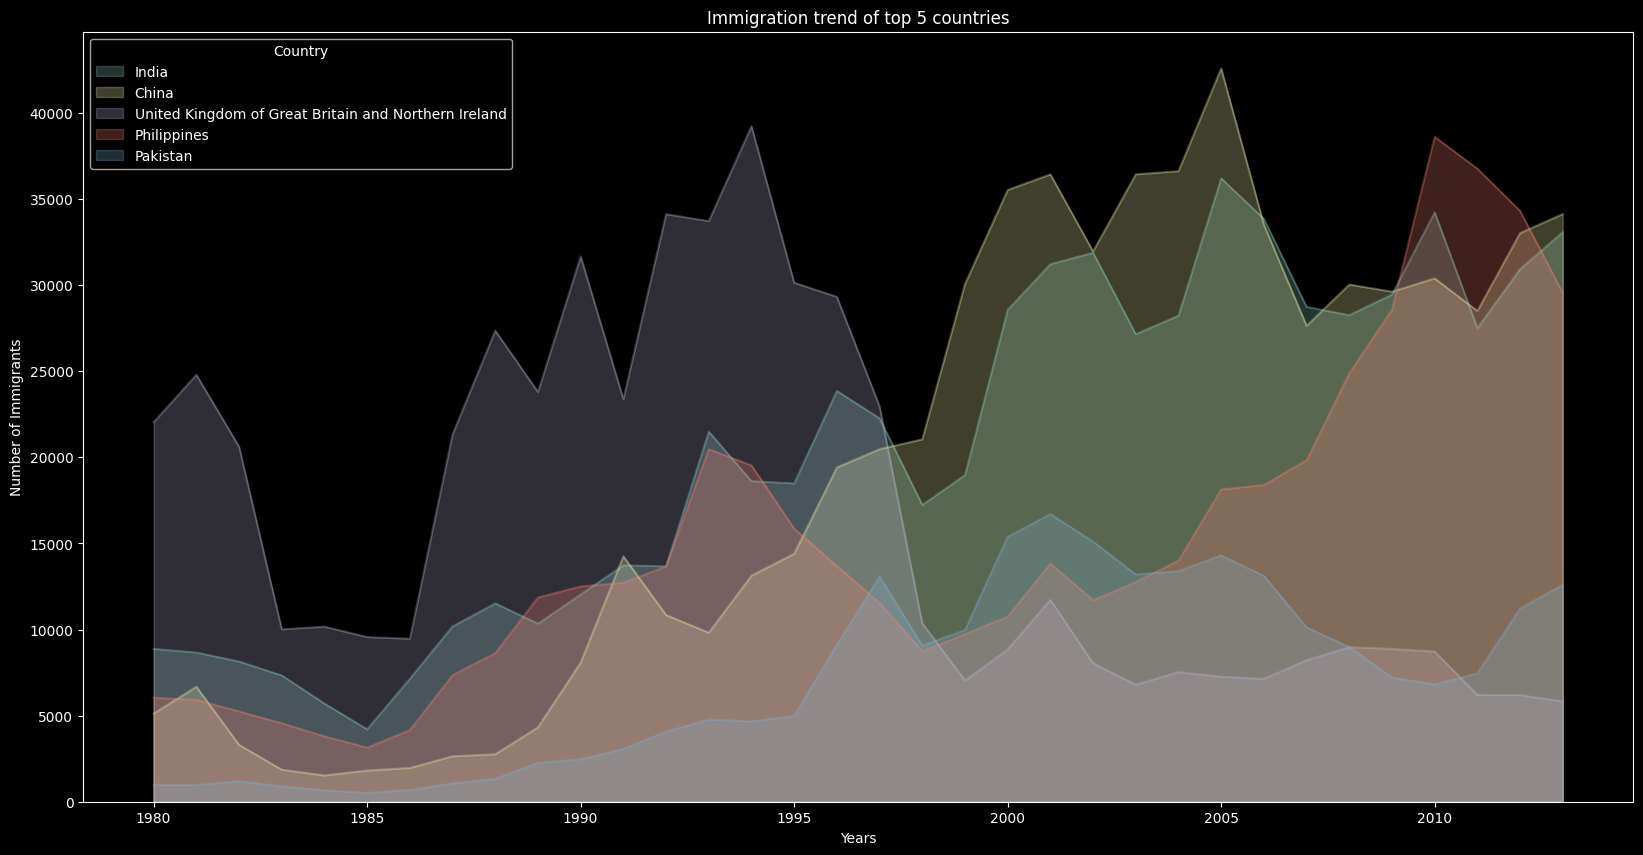

In [27]:
#plotting area plot
#changing the index of data frame to int
df_top5.index = df_top5.index.map(int)

df_top5.plot(
    kind='area',
    stacked=False, #area plot are stacked by default
    figsize=(20, 10),
    alpha= 0.25
)

plt.title('Immigration trend of top 5 countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

#note: for stacked area plot, each column must be either all positive and all negative (and NaN value will default to  0)

Using Artist layer using Axes instance from Matplotlib to plot Area plot. </br>
We can use Axes instance of current plot and store it in a variable say ax.

Text(0.5, 0, 'Years')

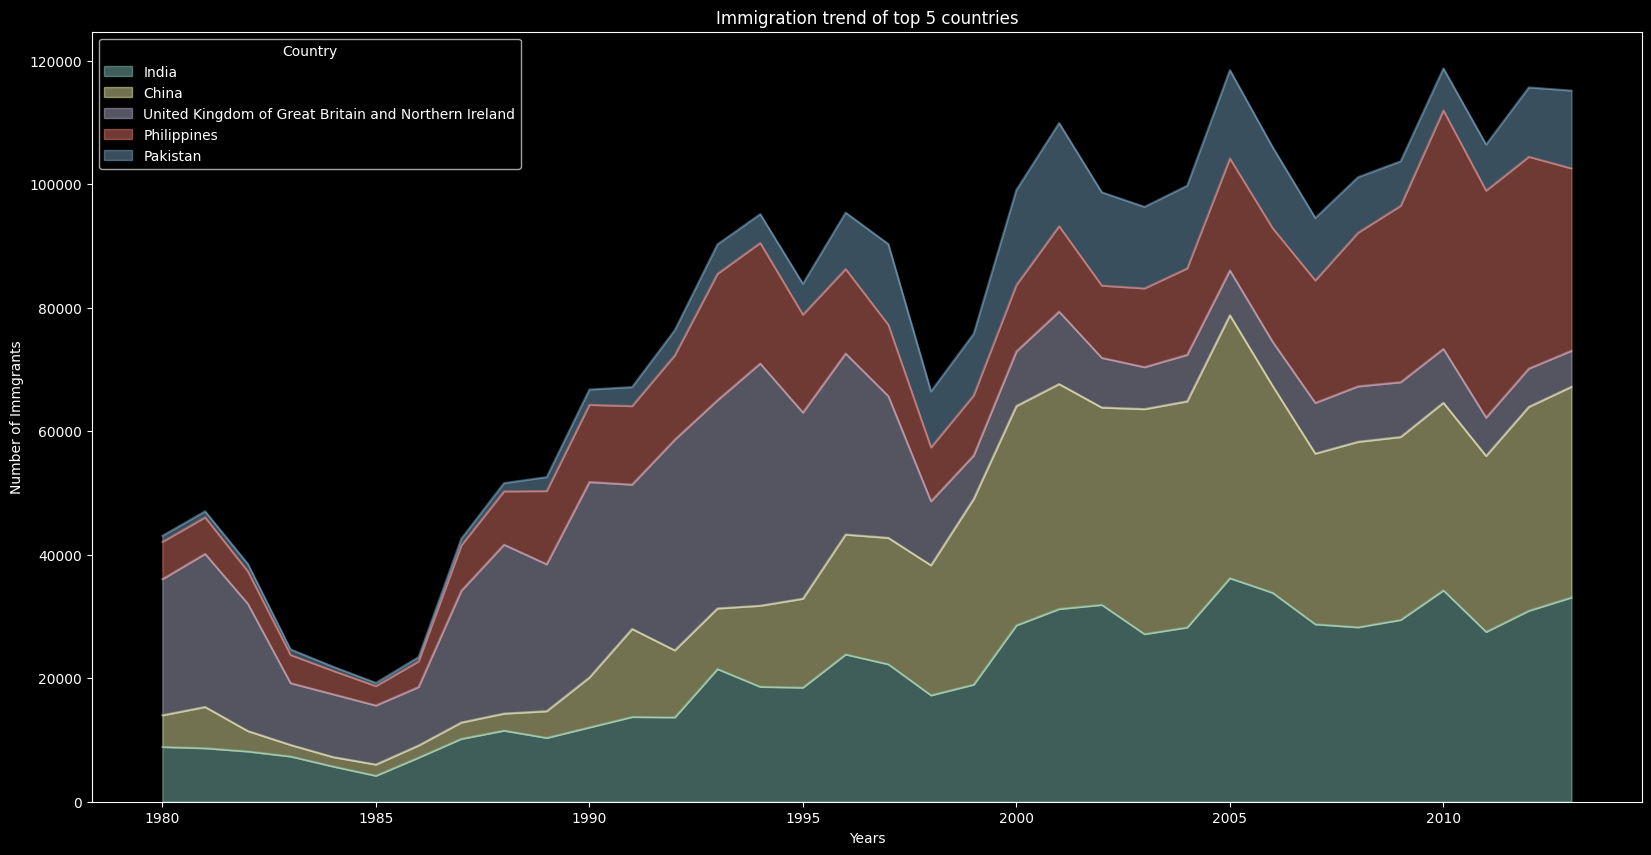

In [28]:
#plotting the stacked area plot using Artist layer
ax = df_top5.plot(
    kind = 'area',
    alpha = .45,
    figsize=(20, 10)
)

ax.set_title('Immigration trend of top 5 countries')
ax.set_ylabel('Number of Immgrants')
ax.set_xlabel('Years')

``` Create a stacked Area plot for 5 countries that contributed least to immigration to Cannada from 1980 to 2013 ```

In [29]:
#getting data for least 5 countries
df.sort_values(['Total'], ascending=True, inplace=True)
df_least5 = df.head()

df_least5 = df_least5[years].transpose()

df_least5.head()

Country,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino
1980,0,0,0,0,1
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


In [30]:
#changing the index to int
df_least5.index = df_least5.index.map(int)

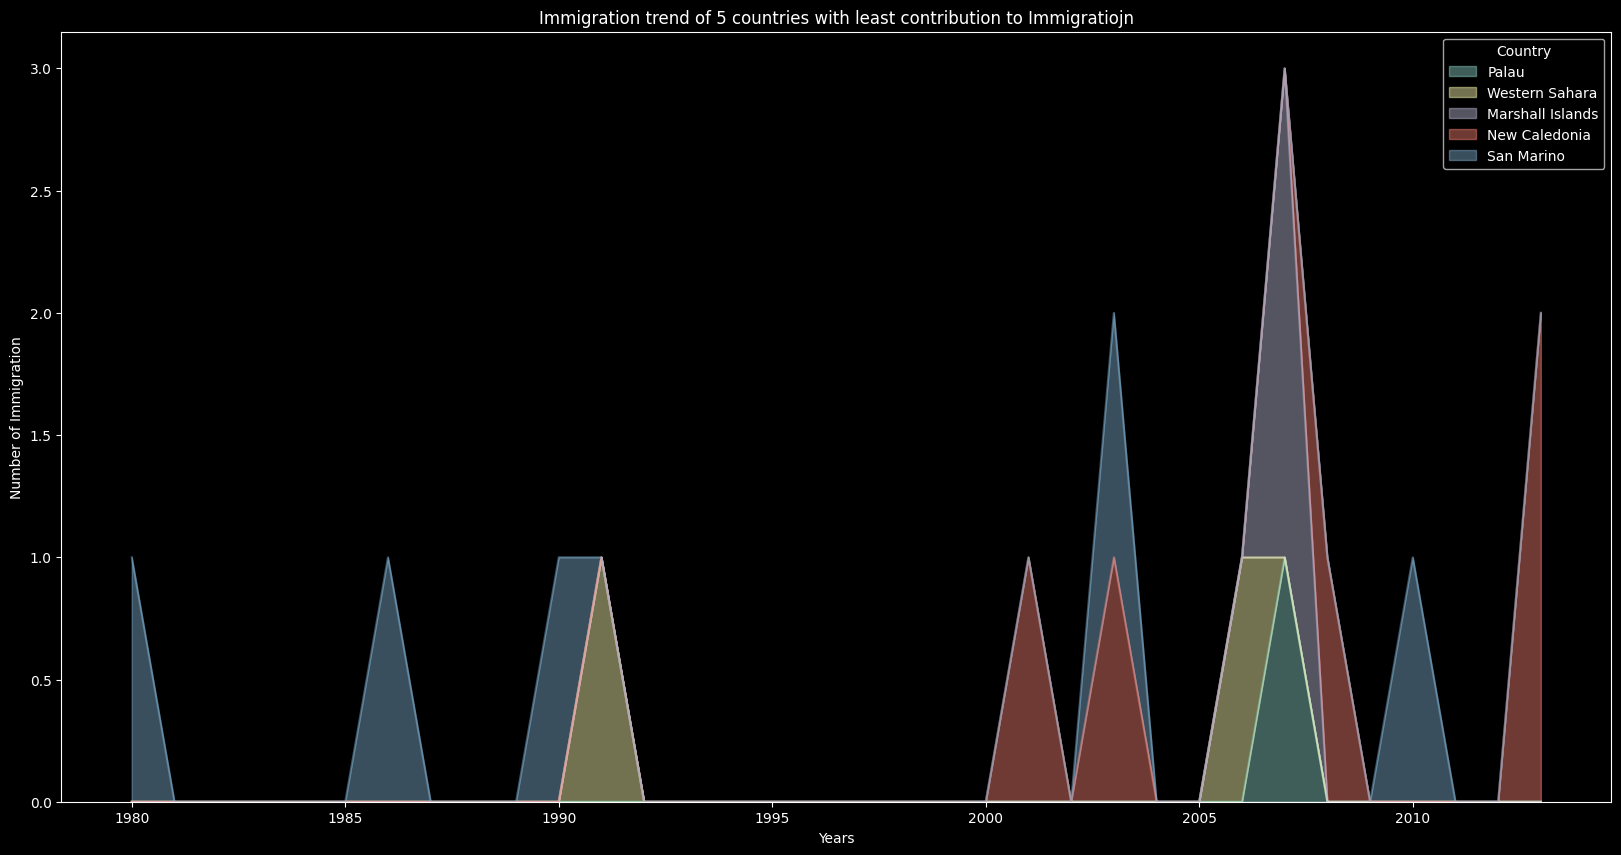

In [32]:
#plotting the Area plot
df_least5.plot(
    kind='area',
    alpha=0.45,
    figsize=(20,10)
)

plt.title('Immigration trend of 5 countries with least contribution to Immigratiojn')
plt.ylabel('Number of Immigration')
plt.xlabel('Years')

plt.show()

#### Histograms

``` Frequency distribution of number of new immigrants from various contries to Canada in 2013 ```

In [34]:
df['2013'].tail()

Country
Pakistan                                                12603
Philippines                                             29544
United Kingdom of Great Britain and Northern Ireland     5827
China                                                   34129
India                                                   33087
Name: 2013, dtype: int64

In [35]:
#np.histogram return two values
count, bin_edges = np.histogram(df['2013'])

print('Count:', count)
print('Bin Edges:', bin_edges)

Count: [178  11   1   2   0   0   0   0   1   2]
Bin Edges: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


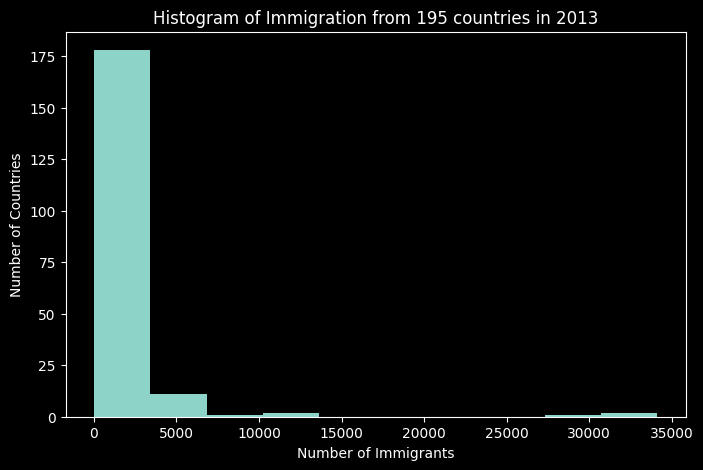

In [36]:
#plotting the histogram
df['2013'].plot(
    kind= 'hist',
    figsize= (8, 5)
)

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

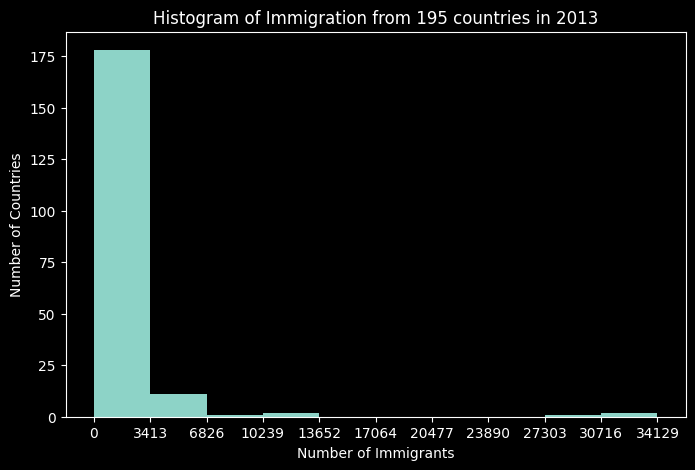

In [37]:
#to match x label to bin_edges, passing parameter xticks = bin edges
#re-plotting with this parameter

df['2013'].plot(
    kind= 'hist',
    figsize= (8, 5),
    xticks = bin_edges
)

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

```Immigration distribution for Denmark, Norway and Sweden for year 1980 - 2013 ```

In [39]:
#getting data set for Demark, Norway and Sweden
df_DNS = df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_DNS

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

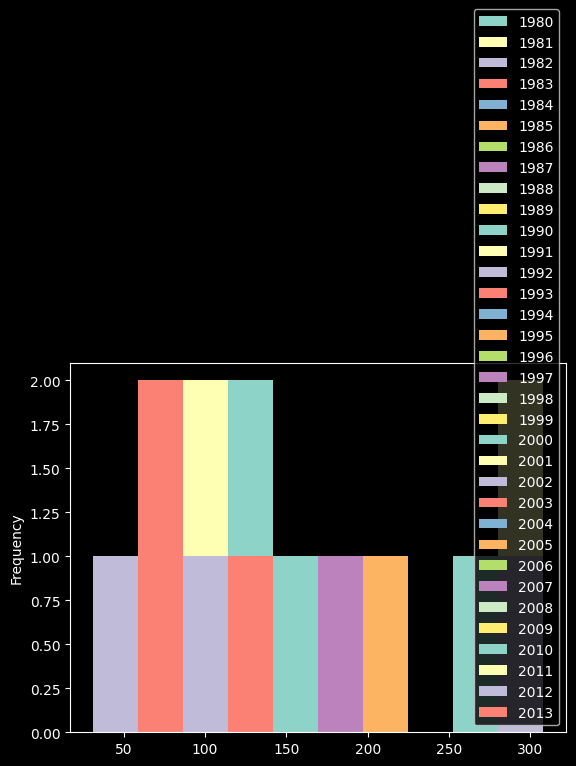

In [40]:
#generating histogram
df_DNS.plot.hist()

As plot doesn't look good. </br>
Instead of plotting frequency distribution of populkation of three countries, plot the frequency distribution for the years

In [43]:
#taking transpose of data
df_DNS=df_DNS.transpose()
df_DNS.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


Text(0.5, 0, 'Number of Immigrants')

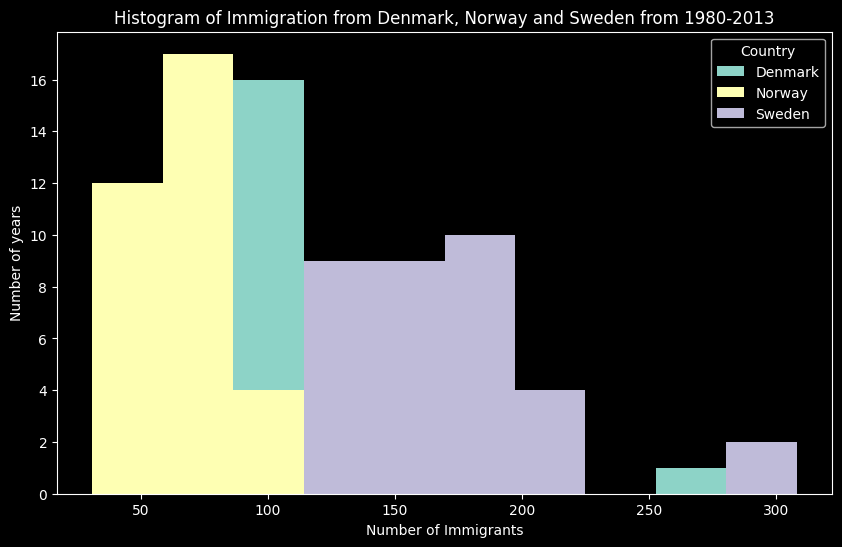

In [44]:
#plotting histogram
df_DNS.plot(
    kind='hist',
    figsize = (10,6)
)

plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1980-2013')
plt.ylabel('Number of years')
plt.xlabel('Number of Immigrants')

Text(0.5, 0, 'Number of Immigrants')

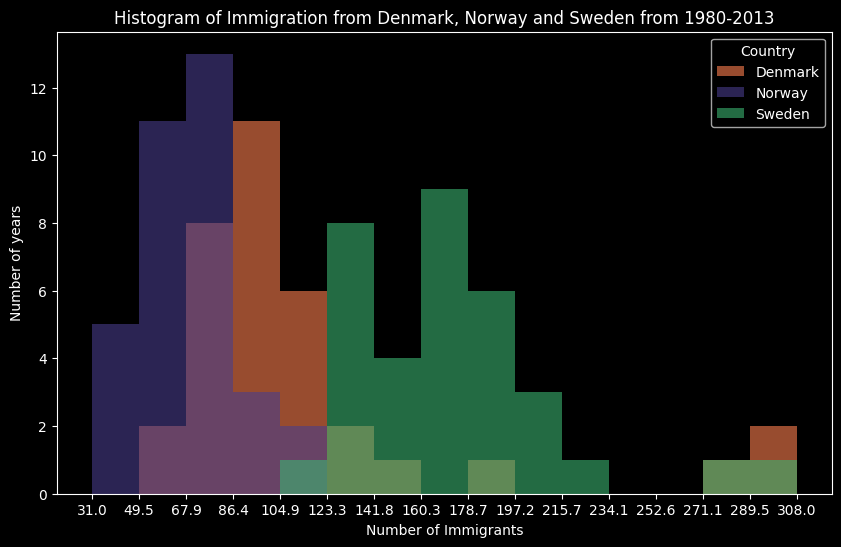

In [45]:
#Improvinf impact and aesthetics of Histogram

count, bin_edges = np.histogram(df_DNS, 15)

#unstacked histogram
df_DNS.plot(
    kind='hist',
    figsize= (10, 6),
    bins = 15,
    alpha = 0.6,
    xticks = bin_edges,
    color=['coral', 'darkslateblue', 'mediumseagreen']
)

plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1980-2013')
plt.ylabel('Number of years')
plt.xlabel('Number of Immigrants')

Text(0.5, 0, 'Number of Immigrants')

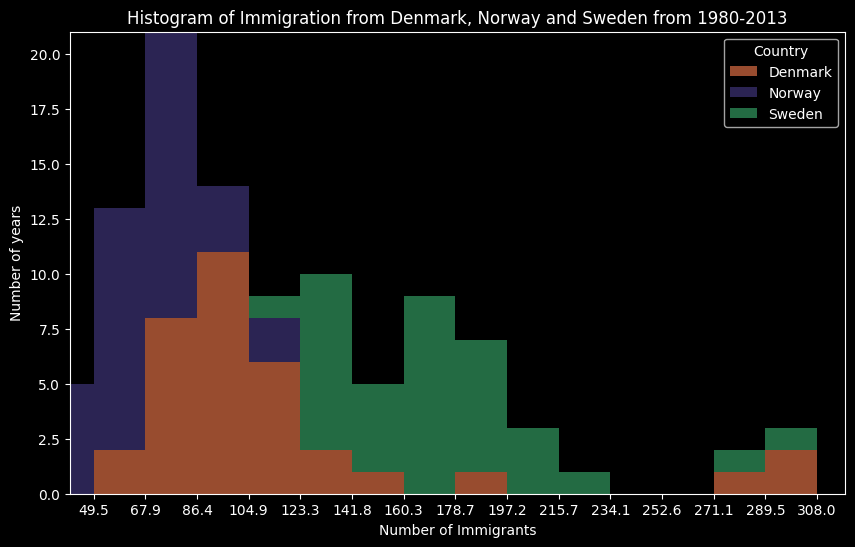

In [46]:
#creating stacked histogram
count, bin_edges = np.histogram(df_DNS, 15)
xmin = bin_edges[0] + 10 
xmax = bin_edges[-1] + 10 

#plottting histogram 
df_DNS.plot(
    kind='hist',
    figsize= (10, 6),
    bins = 15,
    alpha = 0.6,
    xticks = bin_edges,
    color=['coral', 'darkslateblue', 'mediumseagreen'],
    stacked = True, 
    xlim= (xmin, xmax)
)

plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1980-2013')
plt.ylabel('Number of years')
plt.xlabel('Number of Immigrants')